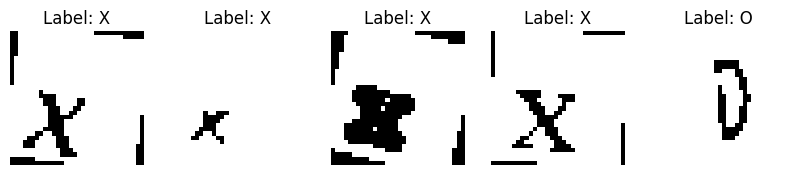

In [81]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os

# 데이터 경로
X_image_folder = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
O_image_folder = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000"
X_label_csv_path = "/home/addinedu/dev_ws/data/handwritten_dataset/train/X2_labels.csv"
O_label_csv_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000.csv"

def load_and_preprocess_image(image_path, grayscale=True, threshold=True):
    image = cv2.imread(image_path)
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 그레이 스케일 변환
    if threshold:
        _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)  # 이진화
    image = cv2.resize(image, (32, 32))  # 이미지 크기를 32x32로 조정
    image = image / 255.0  # 이미지를 0과 1 사이의 값으로 정규화
    return image.reshape((32, 32, 1 if grayscale else 3)) if not threshold else image.reshape((32, 32, 1))


def create_dataset(image_folder, label_csv_path, grayscale=True, threshold=True):
    label_df = pd.read_csv(label_csv_path)
    
    images = []
    labels = []

    for index, row in label_df.iterrows():
        image_path = os.path.join(image_folder, row["Image_Path"])
        label = row["Label"]
        image = load_and_preprocess_image(image_path, grayscale, threshold)
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

X_images, _ = create_dataset(X_image_folder, X_label_csv_path)
X_labels = np.zeros(len(X_images), dtype=int)  # X 이미지는 0으로 라벨링

O_images, _ = create_dataset(O_image_folder, O_label_csv_path)
O_labels = np.ones(len(O_images), dtype=int)  # O 이미지는 1로 라벨링

# 이미지 데이터와 라벨 데이터를 합치기
images = np.concatenate((X_images, O_images), axis=0)
labels = np.concatenate((X_labels, O_labels), axis=0)

X_train, X_val, y_train, y_val = train_test_split(images, labels, shuffle=True,test_size=0.2, random_state=13)

num_images_to_visualize = 5


plt.figure(figsize=(10, 5))
for i in range(num_images_to_visualize):
    idx = np.random.randint(0, len(images))
    
    image = images[idx]
    label = "X" if labels[idx] == 0 else "O"
    
    plt.subplot(1, num_images_to_visualize, i+1)
    plt.imshow(image.squeeze(), cmap='gray')  
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

lenet >> cnn 학습 중 over fitting 문제로 인해서 모델을 가볍게 만들기 원함 그래서 르넷을 사용해봄ㅋ

In [86]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os

# X_image_folder = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
# O_image_folder = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000"
# X_label_csv_path = "/home/addinedu/dev_ws/data/handwritten_dataset/train/X2_labels.csv"
# O_label_csv_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000.csv"
X_image_folder = "/home/addinedu/dev_ws/data/xxxxx/x"
O_image_folder = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/OOOOO"
X_label_csv_path = "/home/addinedu/dev_ws/data/xxxxx/x_labels.csv"
O_label_csv_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/OOOOO/O_labels.csv"


def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV) 
    image = cv2.resize(image, (32, 32))  
    image = image / 255.0  
    return image

def create_dataset(image_folder, label_csv_path):
    label_df = pd.read_csv(label_csv_path)
    images = []
    labels = []
    for index, row in label_df.iterrows():
        image_path = os.path.join(image_folder, row["Image_Path"])
        label = row["Label"]
        image = load_and_preprocess_image(image_path)
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# X_images, _ = create_dataset(X_image_folder, X_label_csv_path)
# X_labels = np.zeros(len(X_images), dtype=int)  # X 이미지는 0으로 라벨링

# O_images, _ = create_dataset(O_image_folder, O_label_csv_path)
# O_labels = np.ones(len(O_images), dtype=int)  # O 이미지는 1로 라벨링
#-------------
# O_images, _ = create_dataset(O_image_folder, O_label_csv_path)
# O_labels = np.zeros(len(O_images), dtype=int)  # X 이미지는 0으로 라벨링

# X_images, _ = create_dataset(X_image_folder, X_label_csv_path)
# X_labels = np.ones(len(X_images), dtype=int)  # O 이미지는 1로 라벨링

O_images, O_labels = create_dataset(O_image_folder, O_label_csv_path)

X_images, X_labels = create_dataset(X_image_folder, X_label_csv_path)

images = np.concatenate((X_images, O_images), axis=0)
labels = np.concatenate((X_labels, O_labels), axis=0)

X_train, X_val, y_train, y_val = train_test_split(images, labels, shuffle=True, test_size=0.2, random_state=13)

num_classes = len(np.unique(labels))

# def initialize_model():
#     model = models.Sequential([
#         layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
#         layers.AveragePooling2D(pool_size=(2, 2)),
#         layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
#         layers.AveragePooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dense(120, activation='relu'),
#         layers.Dense(2, activation='softmax')
#     ])

#LeNet-5
def initialize_model():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=1,padding='same',activation='relu', input_shape=(32, 32, 1)),
        layers.AvgPool2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(16, kernel_size=(5, 5), strides=1,activation='relu'),
        layers.AvgPool2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(120, kernel_size=(5, 5), strides=1,activation='relu'),
        layers.Flatten(),
        layers.Dense(84, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
# def initialize_model():
#     model = models.Sequential([
#         layers.Flatten(input_shape=(32, 32, 1)),
#         layers.Dense(120, activation='relu'),
#         layers.Dense(84, activation='relu'),
#         layers.Dense(2, activation='softmax')
#     ])
    

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = initialize_model()

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10


/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.7551 - loss: 0.4310 - val_accuracy: 0.9936 - val_loss: 0.0402
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0417 - val_accuracy: 0.9936 - val_loss: 0.0132
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9971 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 6.2620e-04 - val_accuracy: 0.9936 - val_loss: 0.0225
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.3997e-04 - val_accuracy: 0.9936 - val_loss: 0.0084
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0267e-04 - val_accuracy: 0.9936 - val_loss: 0.0433
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 1.0000 - val_lo

그래프로 loss 확인

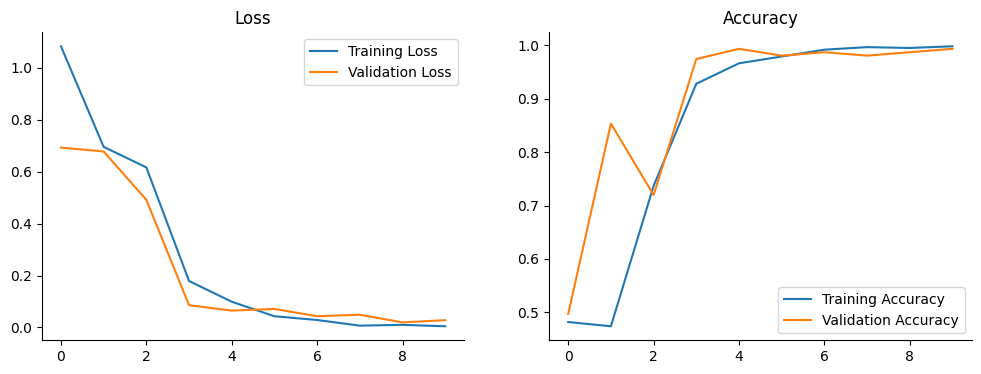

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x=range(len(history.history['loss'])),
             y=history.history['loss'], ax=axes[0],
             label='Training Loss')
sns.lineplot(x=range(len(history.history['val_loss'])),
             y=history.history['val_loss'], ax=axes[0],
             label='Validation Loss')

sns.lineplot(x=range(len(history.history['accuracy'])),
             y=history.history['accuracy'], ax=axes[1],
             label='Training Accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])),
             y=history.history['val_accuracy'], ax=axes[1],
             label='Validation Accuracy')
axes[0].set_title('Loss')
axes[1].set_title('Accuracy')

sns.despine()
plt.show()


모델 저장

In [76]:
model.save("/home/addinedu/dev_ws/DL/Lenet6_model.h5")

이미지 파일을 사용해서 예측진행

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted class probabilities: [[5.97e-43 1.00e+00]]
Predicted class: 1


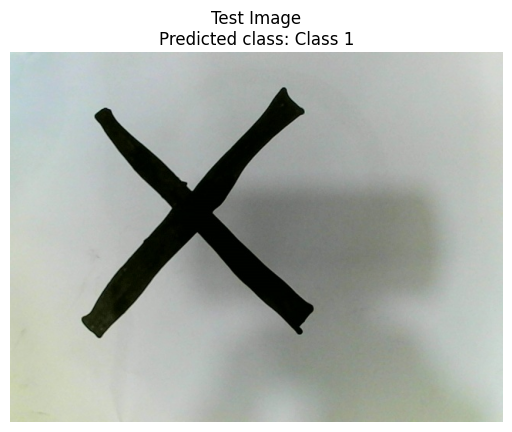

In [84]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 모델 로드
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/cnn1_model.h5')

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (32, 32))
    normalized_image = resized_image / 255.0
    return normalized_image


test_image_path = '/home/addinedu/dev_ws/DL/captured_image1.jpg'

# 이미지 전처리
test_image = preprocess_image(test_image_path)

# 이미지를 배치 형태로 변환
test_image = np.expand_dims(test_image, axis=0)

# 예측
prediction = model.predict(test_image)

class_labels = ["Class 0", "Class 1"]
predicted_class_label = class_labels[predicted_class]
# 예측 결과 출력
print("Predicted class probabilities:", prediction)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)

# 이미지 출력
image = cv2.imread(test_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Test Image\nPredicted class: ' + predicted_class_label)  # 예측값을 제목에 추가
plt.show()

실시간 웹캠을 사용한 인식 >> radius 값 변경하면서 바운딩 박스 크기 최대한 맞추기 그래야 인식률 올라간디

In [80]:
import cv2
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/Lenet6_model.h5')  # 모델 파일 경로 지정


cap = cv2.VideoCapture(-1)


def preprocess_image(img):
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    img = img.astype("float32") / 255.0
    return img
def nothing(x):
    pass
cv2.namedWindow("Trackbars")

cv2.createTrackbar("Min Radius", "Trackbars", 16, 130, nothing)
cv2.createTrackbar("Max Radius", "Trackbars", 30, 150, nothing)

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            min_radius = cv2.getTrackbarPos("Min Radius", "Trackbars")
            max_radius = cv2.getTrackbarPos("Max Radius", "Trackbars")
            g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            thr, bin_img = cv2.threshold(g_img, 140, 255, cv2.THRESH_BINARY_INV)
            
            contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            digits = []
            try:
                for contour in contours:
                    (x, y), radius = cv2.minEnclosingCircle(contour)
                    if min_radius < radius < max_radius:
                        xs, xe = int(x-radius), int(x+radius)
                        ys, ye = int(y-radius), int(y+radius)
                        cv2.rectangle(bin_img, (xs, ys), (xe+10, ye+10), (200, 0, 0), 1)
                        roi = bin_img[ys:ye, xs:xe]
                        
                        roi = cv2.resize(roi, (32, 32), interpolation=cv2.INTER_AREA)
                        roi = roi.astype("float32") / 255.0
                        roi = np.expand_dims(roi, axis=0)
                        
                        # 모델을 사용하여 예측 진행
                        prediction = model.predict(roi)
                        num = np.argmax(prediction)
                        if num == 1:
                            num = 'x'
                        if num == 0:
                            num = 'O'
                        
                        cv2.putText(bin_img, str(num), (xs, ys+20), cv2.FONT_HERSHEY_PLAIN, 3, (200, 0, 0))
            
            except Exception as e:
                pass

            cv2.imshow("Video Capture", bin_img)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            print("No Frame")
            break
else:
    print("Camera not opened")
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

예측 코드


In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    image = image / 255.0
    return image

def predict_image(image_path, model):
    preprocessed_image = preprocess_image(image_path)
    input_image = np.expand_dims(preprocessed_image, axis=0)
    predictions = model.predict(input_image)
    predicted_class = np.argmax(predictions)
    return predicted_class

model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/Lenet1_model.h5')

image_path = '/home/addinedu/dev_ws/data/ox_images/test/O_10.jpg'
predicted_class = predict_image(image_path, model)

class_mapping = {0: 'O', 1: 'X'}

predicted_label = class_mapping[predicted_class]

print("이미지에 대한 예측된 라벨:", predicted_label)


라벨 파일 로드

In [ ]:
import pandas as pd

label_df = pd.read_csv(label_csv_path)

print(label_df.columns)



테스트 데이터셋 가지고 정확도를 측정
>> 테스트 이미지 개수 확인하여 몇장 중에서 몇장 맞췄는지 개수 확인

In [ ]:
import os
import pandas as pd

test_image_folder = "/home/addinedu/dev_ws/data/ox_images/test"
test_label_csv_path = "/home/addinedu/dev_ws/data/ox_images/test_labels.csv"

def create_test_dataset(image_folder):
    test_images = []

    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):  # jpg 파일만 처리
            image_path = os.path.join(image_folder, filename)
            image = load_and_preprocess_image(image_path)
            test_images.append(image)

    return np.array(test_images)

test_images = create_test_dataset(test_image_folder)

predictions = model.predict(test_images)

for i, prediction in enumerate(predictions):
    predicted_label = np.argmax(prediction)
    print(f"Image {i+1}: Predicted Label: {predicted_label}")

test_labels = []
file_names = []

for filename in os.listdir(test_image_folder):
    if filename.endswith(".jpg"):  # jpg 파일만 처리
        file_names.append(filename)
        label = filename[0]  # 파일명의 첫 글자를 라벨로 설정
        if label == 'O':
            test_labels.append(0)
        elif label == 'x':
            test_labels.append(1)

test_data = pd.DataFrame({"File_Name": file_names, "Label": test_labels})
test_data.to_csv(test_label_csv_path, index=False)

print("테스트 라벨이 CSV 파일로 저장되었습니다:", test_label_csv_path)

# 예측 결과 확인 및 정확도 계산
correct_count = 0
total_count = len(test_labels)

for i, (prediction, true_label) in enumerate(zip(predictions, test_labels)):
    predicted_label = np.argmax(prediction)
    
    # 예측 결과와 정답 비교하여 정확도 계산
    if predicted_label == true_label:
        correct_count += 1
    
    print(f"Image {i+1}: Predicted Label: {predicted_label}, True Label: {true_label}")

# 정확도 출력
accuracy = correct_count / total_count
print(f"Accuracy: {accuracy}")


이미지 캡쳐

In [24]:
import cv2

def capture_image():
    # 웹캠에 접근
    cap = cv2.VideoCapture(2)

    if not cap.isOpened():
        print("웹캠을 열 수 없습니다.")
        return

    while True:
        # 프레임 읽기
        ret, frame = cap.read()

        # 프레임 표시
        cv2.imshow('Webcam', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # 's' 키를 누르면 이미지 저장
        elif cv2.waitKey(1) & 0xFF == ord('s'):
            cv2.imwrite('captured_image1.jpg', frame)
            print("이미지를 저장했습니다.")

    # 종료 시 리소스 해제
    cap.release()
    cv2.destroyAllWindows()

# 이미지 캡처 함수 호출
capture_image()


캡쳐한 이미지 모델에 적용

In [20]:
import cv2
import numpy as np
import tensorflow as tf

# 모델 로드
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/cnn1_model.h5')

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (32, 32))
    normalized_image = resized_image / 255.0
    return normalized_image


test_image_path = '/home/addinedu/dev_ws/DL/captured_image.jpg'

# 이미지 전처리
test_image = preprocess_image(test_image_path)

# 이미지를 배치 형태로 변환
test_image = np.expand_dims(test_image, axis=0)

# 예측
prediction = model.predict(test_image)

# 예측 결과 출력
print("Predicted class probabilities:", prediction)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Predicted class probabilities: [[1.000000e+00 3.316801e-16]]
Predicted class: 0
